In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely import wkt

import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn
import logging
import datetime

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
!ls data

GrafoLima_edges.csv			wazeresults30kmh_courthouse.csv
GrafoLima_edgeswaze.csv			wazeresults30kmh_hospital.csv
GrafoLima_edgeswaze.zip			wazeresults30kmh_police.csv
GrafoLima_nodes.csv			wazeresults30kmh_school.csv
GrafoLima_nodes.zip			wazeresults30kmh_university.csv
GrafoSanBorja_edges.csv			wazeresults_bank.csv
GrafoSanBorja_nodes.csv			wazeresults_courthouse.csv
LimaMinValues2Amenities.csv		wazeresults_hospital.csv
limaprivado_wazeresults_police.csv	wazeresults_police.csv
limaprivado_wazeresults_university.csv	wazeresults_school.csv
wazeresults30kmh_bank.csv		wazeresults_university.csv


In [3]:
%%time
amenities = ['school', 'university', 'bank', 'courthouse', 'hospital', 'police']
def readamenity(amenity):
    df = pd.read_csv(f"data/wazeresults_{amenity}.csv", sep=';',)
    df['amenity'] = amenity
    return df

def readamenity2(amenity):
    df = pd.read_csv(f"data/wazeresults30kmh_{amenity}.csv", sep=';',)
    df['amenity'] = amenity
    return df

amenities_data1 = [readamenity(var) for var in amenities]
amenities_data2 = [readamenity2(var) for var in amenities]

CPU times: user 1.68 s, sys: 184 ms, total: 1.86 s
Wall time: 2.07 s


In [4]:
amenities_data = amenities_data1 + amenities_data2

In [5]:
amenities_data[0].set_index(['source', 'target', 'amenity'])

wazeinfo1400_km  wazeinfo0800_minutes  \
source     target     amenity                                          
1746796546 1273938389 school             0.391              0.783333   
           5380596981 school             0.194              0.400000   
           1577952874 school             0.551              1.083333   
           1746791596 school             0.257              0.516667   
           1746791610 school             0.418              0.833333   
...                                        ...                   ...   
1746796543 2177232991 school             0.021              0.016667   
           1273984598 school             0.105              0.266667   
           1577564085 school             0.041              0.050000   
           1746828604 school             0.002              0.000000   
           1746828650 school             0.215              0.400000   

                               wazeinfo1400_minutes  wazeinfo0800_km  
source     target     amenity                                         
1746796546 1273938389 school               0.800000            0.391  
           5380596981 school               0.400000            0.194  
           1577952874 school               1.100000            0.551  
           1746791596 school               0.516667            0.257  
           1746791610 school               0.833333            0.418  
...                                             ...              ...  
1746796543 2177232991 school               0.016667            0.021  
           1273984598 school               0.250000            0.105  
           1577564085 school               0.050000            0.041  
           1746828604 school               0.000000            0.002  
           1746828650 school               0.400000            0.215  

[374959 rows x 4 columns]

In [6]:
data = pd.concat(amenities_data, ignore_index=True)
data

,source,target,wazeinfo1400_km,wazeinfo0800_minutes,wazeinfo1400_minutes,wazeinfo0800_km,amenity,tiempoponderado30kmh
0,1746796546,1273938389,0.391,0.783333,0.800000,0.391,school,NaN
1,1746796546,5380596981,0.194,0.400000,0.400000,0.194,school,NaN
2,1746796546,1577952874,0.551,1.083333,1.100000,0.551,school,NaN
3,1746796546,1746791596,0.257,0.516667,0.516667,0.257,school,NaN
4,1746796546,1746791610,0.418,0.833333,0.833333,0.418,school,NaN
...,...,...,...,...,...,...,...,...
1285349,416645112,5491555259,NaN,NaN,NaN,NaN,police,1.948
1285350,416645112,791160270,NaN,NaN,NaN,NaN,police,1.488
1285351,416645112,819211251,NaN,NaN,NaN,NaN,police,2.498
1285352,859799546,859799546,NaN,NaN,NaN,NaN,police,0.000


In [7]:
# data.query("amenity == 'school'")

In [8]:
# data = pd.concat([data, df30])
# data.head()

In [9]:
# data.query("amenity == 'courthouse' and wazeinfo1400_km > 0")

In [10]:
# data.isna().sum()

In [7]:
%%time
datamin_list = []
columns = ['wazeinfo0800_km', 'wazeinfo1400_minutes','wazeinfo1400_km', 
           'wazeinfo0800_minutes', 
           'tiempoponderado30kmh'
          ]
for column in columns:
    
#     column = 'wazeinfo0800_km'
    grouped = data.groupby(['source', 'amenity'])
    min_indices = grouped[column].idxmin()
#     min_rows = data.loc[min_indices.dropna()]
    min_rows = data.loc[min_indices]

    columns = ['source', 'amenity', column ]
    datamin_list.append(min_rows[columns].set_index('source'))

CPU times: user 29.1 s, sys: 314 ms, total: 29.4 s
Wall time: 29.3 s


In [12]:
# data2 = data.query("amenity == 'school' and tiempoponderado30kmh >= 0")
# grouped = data2.groupby(['source', 'amenity'])
# min_indices = grouped['tiempoponderado30kmh'].idxmin()
# min_rows = data2.loc[min_indices]
# min_rows

In [44]:
# columns = ['source', 'amenity', 'tiempoponderado30kmh' ]
# datamin_list.append( min_rows[columns].set_index('source') )

In [52]:
# len(datamin_list)
# datamin_list[3]
# pd.concat(datamin_list, axis=1)
# ~datamin.columns.duplicated()

In [12]:
datamin_list[4]

,amenity,tiempoponderado30kmh
source,,
31035113,bank,0.370
31035113,courthouse,0.116
31035113,hospital,0.002
31035113,police,0.454
31035113,school,0.002
...,...,...
9829538620,school,0.014
9834894388,school,0.934
9834909423,school,0.000


In [13]:
datamin = pd.concat(datamin_list, axis=1)
datamin = datamin.loc[:,~datamin.columns.duplicated()]
datamin

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,tiempoponderado30kmh
source,,,,,,
31035113,bank,0.185,0.316667,0.185,0.316667,0.370
31035113,courthouse,0.058,0.100000,0.058,0.100000,0.116
31035113,hospital,0.001,0.000000,0.001,0.000000,0.002
31035113,police,0.227,1.583333,0.227,0.716667,0.454
31035113,school,0.001,0.000000,0.001,0.000000,0.002
...,...,...,...,...,...,...
9829538620,school,0.007,0.000000,0.007,0.000000,0.014
9834894388,school,0.467,0.466667,0.467,0.483333,0.934
9834909423,school,0.000,0.000000,0.000,0.000000,0.000


In [15]:
# datamin.to_csv("data/LimaMinValues2Amenities.csv", sep=';')

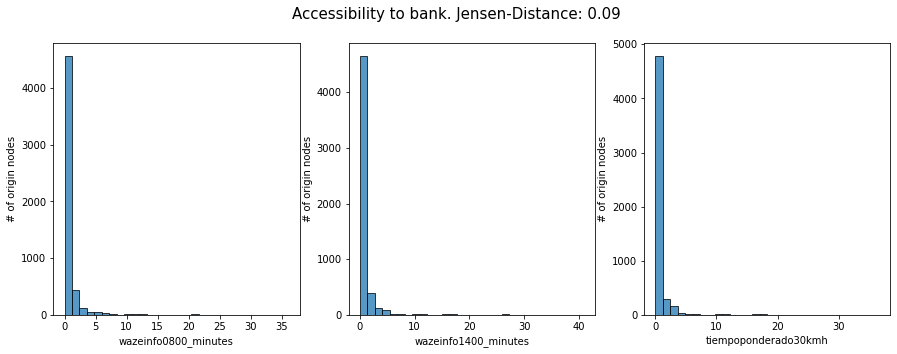

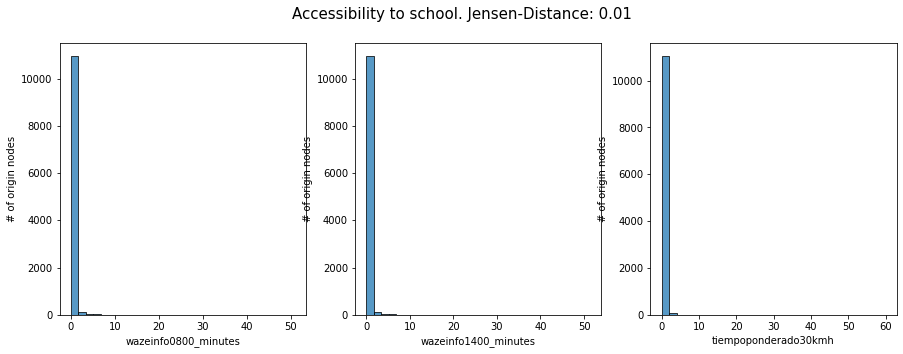

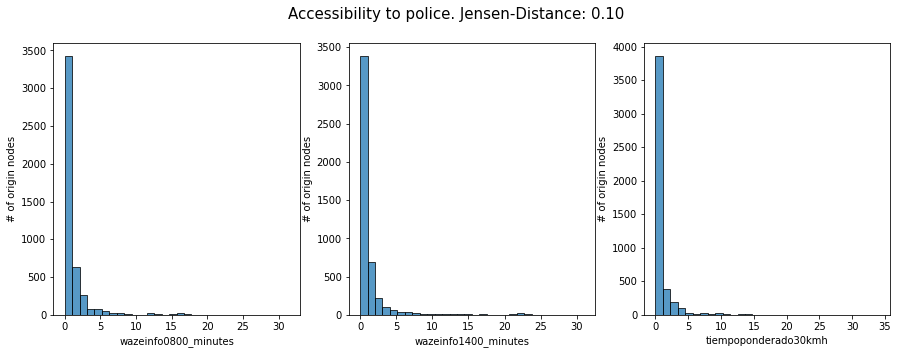

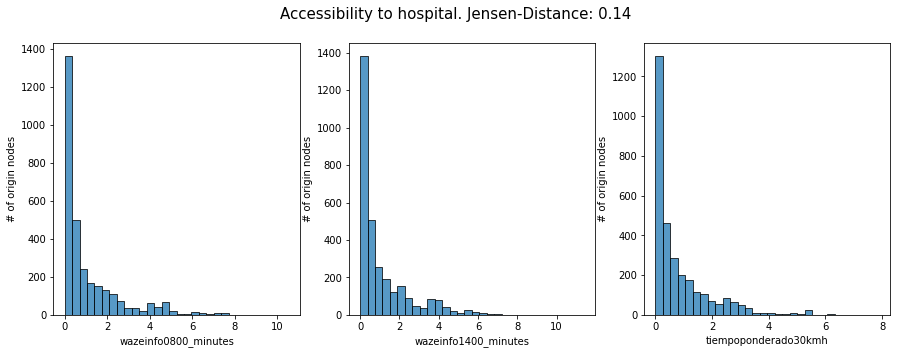

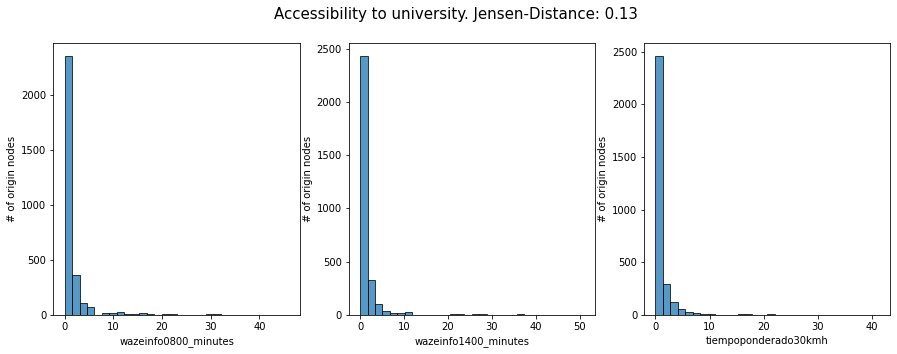

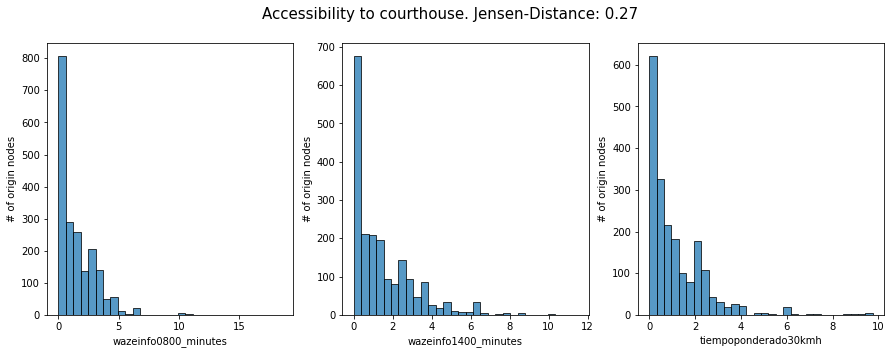

In [88]:
from scipy.spatial import distance

jensen_distances = {}
for amenity in ['bank', 'school', 'police', 'hospital', 'university', 'courthouse']:

    fig, axes = plt.subplots(1,3, figsize=(15,5))
#     amenity = 'university'
    df = datamin.query("amenity == @amenity")
    
    bins=30
    
    hist08, bin_edges08 = np.histogram(df['wazeinfo0800_minutes'], density=True, bins=bins)
    hist14, bin_edges14 = np.histogram(df['wazeinfo1400_minutes'], density=True, bins=bins)
    hist30, bin_edges30 = np.histogram(df['tiempoponderado30kmh'], density=True, bins=bins)


    jensendistance = distance.jensenshannon(hist08, hist14, 2)
    jensen_distances[amenity] = jensendistance

    sns.histplot(data=df, x='wazeinfo0800_minutes', ax=axes[0], bins=bins)
    sns.histplot(data=df, x='wazeinfo1400_minutes', ax=axes[1], bins=bins)
    sns.histplot(data=df, x='tiempoponderado30kmh', ax=axes[2], bins=bins)


    axes[0].set_ylabel("# of origin nodes")
    axes[1].set_ylabel("# of origin nodes")
    axes[2].set_ylabel("# of origin nodes")

    # axes[1].set_title()

    fig.suptitle(f'Accessibility to {amenity}. Jensen-Distance: {jensendistance:.2f} ', fontsize=15)
    plt.show()
    fig.savefig(f"img/lima_accessibility_minutes_{amenity}.png")

In [87]:
# jensen_distances = {}
# for amenity in ['school']:

#     fig, axes = plt.subplots(1,2, figsize=(15,5))
# #     amenity = 'university'
#     df = datamin.query("amenity == @amenity")
    
#     bins=30
    
#     hist08, bin_edges08 = np.histogram(df['wazeinfo0800_minutes'], density=True, bins=bins)
#     hist14, bin_edges14 = np.histogram(df['tiempoponderado30kmh'], density=True, bins=bins)

#     jensendistance = distance.jensenshannon(hist08, hist14, 2)
#     jensen_distances[amenity] = jensendistance

#     sns.histplot(data=df, x='wazeinfo0800_minutes', ax=axes[0], bins=bins)
#     sns.histplot(data=df, x='tiempoponderado30kmh', ax=axes[1], bins=bins)

#     axes[0].set_ylabel("# of origin nodes")
#     axes[1].set_ylabel("# of origin nodes")
#     # axes[1].set_title()

#     fig.suptitle(f'Accessibility to {amenity}. Jensen-Distance: {jensendistance:.2f} ', fontsize=15)
#     plt.show()
# #     fig.savefig(f"img/lima_accessibility_minutes_{amenity}.png")

<AxesSubplot:xlabel='tiempoponderado30kmh', ylabel='Count'>

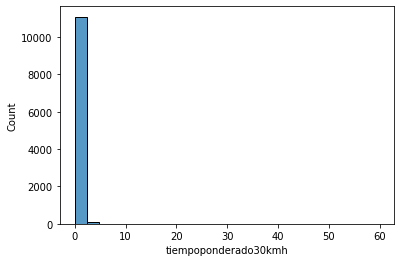

In [65]:
df = datamin.query("amenity == 'school'")
df = df.dropna(how='any',axis=0)
sns.histplot(data=df, x='tiempoponderado30kmh', bins=25)


<AxesSubplot:xlabel='tiempoponderado30kmh', ylabel='Density'>

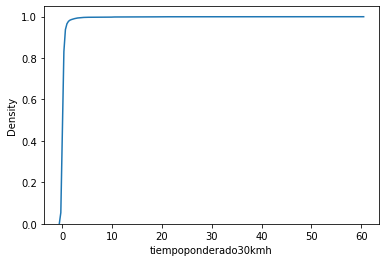

In [68]:
sns.kdeplot(data=df, x='tiempoponderado30kmh', cumulative=True)


# Jensen distance

In [85]:
from scipy.spatial import distance
import numpy as np

In [27]:
amenity = 'police'
df = datamin.query("amenity == @amenity")
df

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes
source,,,,,
31035113,police,0.227,1.583333,0.227,0.716667
31035116,police,0.227,1.583333,0.227,0.716667
31035121,police,0.372,1.983333,0.372,1.516667
31035123,police,0.397,1.933333,0.397,1.466667
31035125,police,0.441,1.500000,0.441,1.616667
...,...,...,...,...,...
9765234529,police,4.245,6.900000,4.245,6.466667
9765247768,police,1.666,9.916667,2.413,5.116667
9765247769,police,1.776,14.116667,2.523,8.216667


In [30]:
distance.jensenshannon(df['wazeinfo0800_km'], df['wazeinfo1400_km'], 2)

0.035154018425022214

In [75]:
hist08, bin_edges08 = np.histogram(df['wazeinfo0800_minutes'], density=True, bins=50)
hist14, bin_edges14 = np.histogram(df['wazeinfo1400_minutes'], density=True, bins=50)

In [76]:
distance.jensenshannon(hist08, hist14, 2)

0.31186214632910353

In [51]:
bin_edges

array([ 0.        ,  3.13833333,  6.27666667,  9.415     , 12.55333333,
       15.69166667, 18.83      , 21.96833333, 25.10666667, 28.245     ,
       31.38333333])

In [79]:
jensen_distances = {}
for amenity in ['bank', 'school', 'police', 'hospital', 'university', 'courthouse']:

    df = datamin.query("amenity == @amenity")

    hist08, bin_edges08 = np.histogram(df['wazeinfo0800_minutes'], density=True, bins=30)
    hist14, bin_edges14 = np.histogram(df['wazeinfo1400_minutes'], density=True, bins=30)

    jensen_distances[amenity] = distance.jensenshannon(hist08, hist14, 2)

In [80]:
jensen_distances

{'bank': 0.09076376132065789,
 'school': 0.011353239732631392,
 'police': 0.10117200328624648,
 'hospital': 0.14423810900997416,
 'university': 0.13289942895510362,
 'courthouse': 0.2716522894625839}

In [64]:
!ls ../SimBig22/rutas

Cusco_Distance2Amenities.csv
cusco_means_final.csv
GrafoTransporte_edges.csv
GrafoTransporte.graphml
GrafoTransporteNodes_Bank_2.csv
GrafoTransporteNodes_Bank.csv
GrafoTransporteNodes_Casino_2.csv
GrafoTransporteNodes_Casino.csv
GrafoTransporteNodes_Courthouse_2.csv
GrafoTransporteNodes_Courthouse.csv
GrafoTransporte_nodes.csv
GrafoTransporteNodes_Hospital_2.csv
GrafoTransporteNodes_Hospital.csv
GrafoTransporteNodes_Marketplace_2.csv
GrafoTransporteNodes_Marketplace.csv
GrafoTransporteNodes_Police_2.csv
GrafoTransporteNodes_Police.csv
GrafoTransporteNodes_School_2.csv
GrafoTransporteNodes_School.csv
GrafoTransporteNodes_University_2.csv
GrafoTransporteNodes_University.csv
GrafoTransporteWithNearestAmenities.csv
MapaLimaCallao.csv
public_transport_distancias_avg_complete.csv
Rutas_Corredores_Complementarios.csv
Rutas_COSAC_I.csv
Rutas_Cusco.xlsx
RutasLima_snap_LimaNodes.csv
Rutas_Transporte_Publico_Lima.csv
Rutas_Transporte_Publico_Points_Lima.csv


# Mapas

In [8]:
mapaLimaCallao = pd.read_csv('../SimBig22/rutas/MapaLimaCallao.csv')
mapaLimaCallao['geometry'] = mapaLimaCallao['geometry'].apply(wkt.loads)
mapaLimaCallao = gpd.GeoDataFrame(mapaLimaCallao, crs='epsg:4326')
mapaLimaCallao['distrito2'] = mapaLimaCallao.apply(lambda x: x['distrito'].replace(' ','_'), axis=1)
mapaLimaCallao.head()

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry,LimaCallao,distrito2
0,7,CALLAO,701,CALLAO,70105,LA PUNTA,LA PUNTA,1,1,INEI,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0...",True,LA_PUNTA
1,7,CALLAO,701,CALLAO,70104,LA PERLA,LA PERLA,1,1,INEI,"POLYGON ((-77.10444 -12.07020, -77.10486 -12.0...",True,LA_PERLA
2,7,CALLAO,701,CALLAO,70102,BELLAVISTA,BELLAVISTA,1,1,INEI,"POLYGON ((-77.10086 -12.06307, -77.10317 -12.0...",True,BELLAVISTA
3,7,CALLAO,701,CALLAO,70103,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,1,1,INEI,"POLYGON ((-77.08317 -12.03925, -77.08263 -12.0...",True,CARMEN_DE_LA_LEGUA_REYNOSO
4,7,CALLAO,701,CALLAO,70101,CALLAO,CALLAO,1,1,INEI,"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9...",True,CALLAO


<AxesSubplot:>

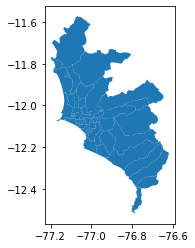

In [9]:
mapaLimaCallao.plot()

In [10]:
import numpy as np

In [14]:
datamin

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,tiempoponderado30kmh
source,,,,,,
31035113,bank,0.185,0.316667,0.185,0.316667,0.370
31035113,courthouse,0.058,0.100000,0.058,0.100000,0.116
31035113,hospital,0.001,0.000000,0.001,0.000000,0.002
31035113,police,0.227,1.583333,0.227,0.716667,0.454
31035113,school,0.001,0.000000,0.001,0.000000,0.002
...,...,...,...,...,...,...
9829538620,school,0.007,0.000000,0.007,0.000000,0.014
9834894388,school,0.467,0.466667,0.467,0.483333,0.934
9834909423,school,0.000,0.000000,0.000,0.000000,0.000


In [15]:
lima_nodes = pd.read_csv("data/GrafoLima_nodes.csv", index_col=[0])
lima_nodes['geometry'] = lima_nodes['geometry'].apply(wkt.loads)
lima_nodes = gpd.GeoDataFrame(lima_nodes, crs='epsg:4326')

In [16]:
lima_edges = pd.read_csv("data/GrafoLima_edges.csv", index_col=[0,1])
lima_edges['geometry'] = lima_edges['geometry'].apply(wkt.loads)
lima_edges = gpd.GeoDataFrame(lima_edges, crs='epsg:4326')

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,7,13,14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
%%time
lima_edgeswaze = pd.read_csv("data/GrafoLima_edgeswaze.csv", index_col=[0,1])
lima_edgeswaze['geometry'] = lima_edgeswaze['geometry'].apply(wkt.loads)
lima_edgeswaze = gpd.GeoDataFrame(lima_edgeswaze, crs='epsg:4326')

<string>:2: DtypeWarning: Columns (5,7,13,14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 48.9 s, sys: 351 ms, total: 49.3 s
Wall time: 49.3 s


In [50]:
%%time
lima_edgeswaze_privado = pd.read_csv("data/limaprivado_wazeresults_police.csv", index_col=[0,1], sep=";")
lima_edgeswaze_privado.head()

CPU times: user 1.06 s, sys: 55.8 ms, total: 1.11 s
Wall time: 1.11 s


wazeinfo0800_km  wazeinfo1400_minutes  \
source     target                                              
1738539013 1833609509            0.581              1.050000   
           1577563979            0.589              1.083333   
           5321367407            0.601              1.083333   
           499590042             0.540              1.033333   
           3035972003            0.568              1.083333   

                       wazeinfo0800_minutes  wazeinfo1400_km  
source     target                                             
1738539013 1833609509              1.200000            0.581  
           1577563979              1.233333            0.589  
           5321367407              1.233333            0.601  
           499590042               1.183333            0.540  
           3035972003              1.233333            0.568

In [18]:
print(lima_edges.shape)
print(lima_edgeswaze.shape)

(395620, 16)
(395620, 22)


<AxesSubplot:>

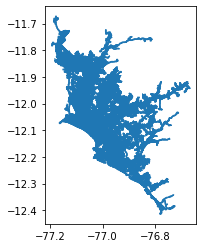

In [19]:
lima_edgeswaze.plot()

<AxesSubplot:>

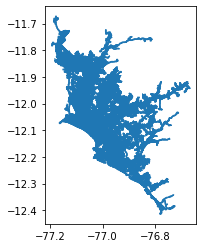

In [20]:
lima_edges.plot()

In [66]:
amenity = 'bank'
lima_amenity = datamin.query("amenity == @amenity")

In [67]:
lima_amenity.head()

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,tiempoponderado30kmh
source,,,,,,
31035113,bank,0.185,0.316667,0.185,0.316667,0.370
31035116,bank,0.185,0.316667,0.185,0.316667,0.370
31035121,bank,0.105,0.483333,0.105,0.433333,0.210
31035123,bank,0.130,0.433333,0.130,0.383333,0.260
31035125,bank,0.004,0.000000,0.004,0.000000,0.008


In [68]:
def myfunction(x):
    if x < 0:
        val = 0.000001
    else:
        val = x+0.000001
    return np.log(val)
    
# lima_amenity['wazeinfo1400_minutes'].map(myfunction)

In [69]:
lima_amenity.loc[:,'color'] = lima_amenity['wazeinfo1400_minutes'].map(myfunction)

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [70]:
lima_edgeswaze['wazeinfo1400_minutes'].describe()

count    395620.000000
mean          0.293046
std           1.080719
min          -1.000000
25%           0.000000
50%           0.083333
75%           0.283333
max          96.300000
Name: wazeinfo1400_minutes, dtype: float64

In [71]:
lima_edgeswaze.loc[:,'color'] = lima_edgeswaze['wazeinfo1400_minutes'].map(myfunction)

Text(0.5, 0.91, 'POLICE')

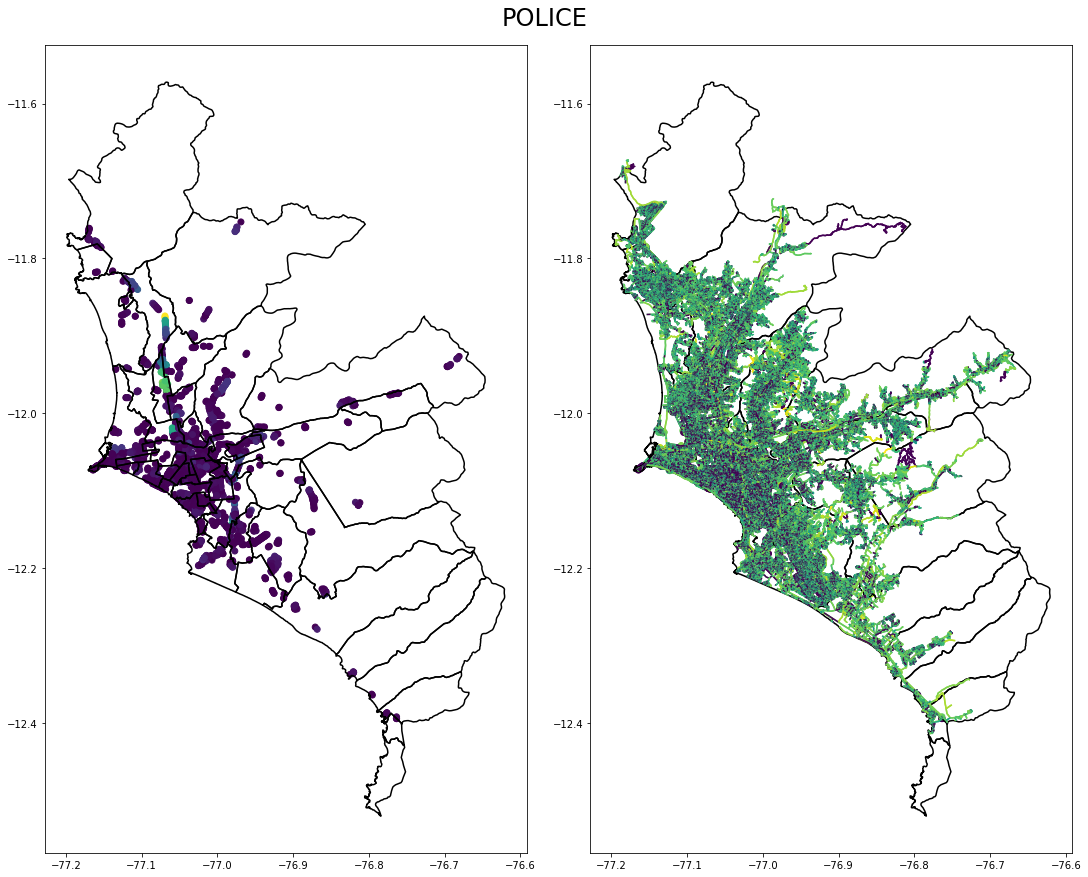

In [32]:
fig, ax = plt.subplots(1,2, constrained_layout=True, figsize=(15,15))

mapaLimaCallao.boundary.plot(ax=ax[0], color='black', )
mapaLimaCallao.boundary.plot(ax=ax[1], color='black', )


lima_plot = lima_nodes.join(lima_amenity, how='inner')

lima_plot.plot(column='wazeinfo1400_minutes', ax=ax[0], legend=False)
lima_plot.plot(column='color', ax=ax[1], legend=False)
lima_edgeswaze.plot(column='color', ax=ax[1], legend=False)


fig.suptitle(amenity.upper(), x=0.5, y=0.91, fontsize = 24)


Text(0.7, 0.91, 'BANK')

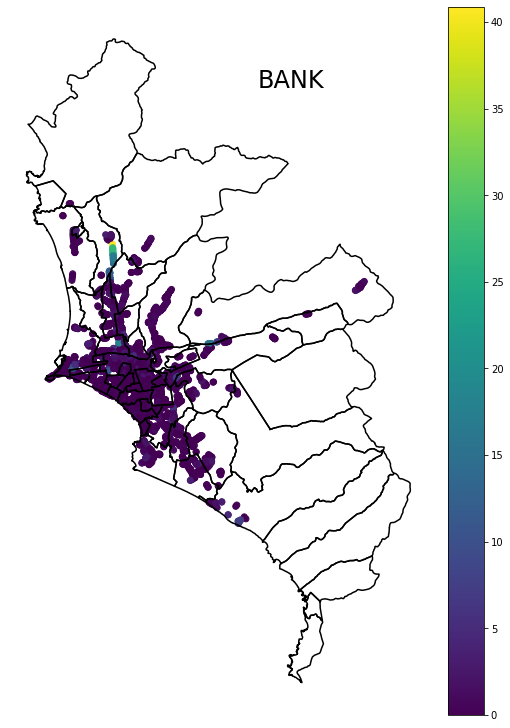

In [72]:


fig, ax = plt.subplots(constrained_layout=True, figsize=(10,10))
# ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

mapaLimaCallao.boundary.plot(ax=ax, color='black', )

lima_plot = lima_nodes.join(lima_amenity, how='inner')

lima_plot.plot(column='wazeinfo1400_minutes', ax=ax, legend=True)
# lima_plot.plot(column='color', ax=ax, legend=True)
# lima_edgeswaze.plot(column='color', ax=ax[1], legend=False)


fig.suptitle(amenity.upper(), x=0.7, y=0.91, fontsize = 24)


In [52]:
lima_edgeswaze.head()

key                               osmid  oneway lanes  \
u         v                                                                    
258066779 10985400003    0                            39457621    True     1   
          258066780      0  [1046533254, 338193454, 143630423]    True     2   
258066780 258066781      0                           143630430    True     2   
258066781 258066783      0                           143630430    True     2   
          495302399      0                            40752940    True     1   

                             highway maxspeed    length  \
u         v                                               
258066779 10985400003  motorway_link       80   109.492   
          258066780         motorway      100   782.922   
258066780 258066781            trunk      100  1301.315   
258066781 258066783            trunk      100   194.871   
          495302399       trunk_link      NaN    85.154   

                                                                geometry  \
u         v                                                                
258066779 10985400003  LINESTRING (-76.78468 -12.37136, -76.78466 -12...   
          258066780    LINESTRING (-76.78468 -12.37136, -76.78433 -12...   
258066780 258066781    LINESTRING (-76.77956 -12.37632, -76.77670 -12...   
258066781 258066783    LINESTRING (-76.77105 -12.38455, -76.76977 -12...   
          495302399    LINESTRING (-76.77105 -12.38455, -76.77099 -12...   

                         ref                        name  ... tunnel width  \
u         v                                               ...                
258066779 10985400003    NaN                         NaN  ...    NaN   NaN   
          258066780    PE-1S  Carretera Panamericana Sur  ...    NaN   NaN   
258066780 258066781    PE-1S  Carretera Panamericana Sur  ...    NaN   NaN   
258066781 258066783    PE-1S  Carretera Panamericana Sur  ...    NaN   NaN   
          495302399      NaN                         NaN  ...    NaN   NaN   

                      service                  wazeinfo0800  \
u         v                                                   
258066779 10985400003     NaN                 (0.05, 0.107)   
          258066780       NaN                 (0.45, 0.781)   
258066780 258066781       NaN  (0.03333333333333333, 0.063)   
258066781 258066783       NaN   (1.6666666666666667, 0.612)   
          495302399       NaN                  (0.1, 0.091)   

                                       wazeinfo1400 wazeinfo0800_minutes  \
u         v                                                                
258066779 10985400003                 (0.05, 0.107)             0.050000   
          258066780                   (0.45, 0.781)             0.450000   
258066780 258066781    (0.03333333333333333, 0.063)             0.033333   
258066781 258066783     (1.7166666666666666, 0.612)             1.666667   
          495302399                    (0.1, 0.091)             0.100000   

                      wazeinfo0800_km wazeinfo1400_minutes  wazeinfo1400_km  \
u         v                                                                   
258066779 10985400003           0.107             0.050000            0.107   
          258066780             0.781             0.450000            0.781   
258066780 258066781             0.063             0.033333            0.063   
258066781 258066783             0.612             1.716667            0.612   
          495302399             0.091             0.100000            0.091   

                          color  
u         v                      
258066779 10985400003 -2.995712  
          258066780   -0.798505  
258066780 258066781   -3.401167  
258066781 258066783    0.540385  
          495302399   -2.302575  

[5 rows x 23 columns]

In [58]:
lima_edgeswaze_privado.index.rename(['u','v'], inplace=True)

In [59]:
lima_edgeswaze_privado.head()

wazeinfo0800_km  wazeinfo1400_minutes  \
u          v                                                   
1738539013 1833609509            0.581              1.050000   
           1577563979            0.589              1.083333   
           5321367407            0.601              1.083333   
           499590042             0.540              1.033333   
           3035972003            0.568              1.083333   

                       wazeinfo0800_minutes  wazeinfo1400_km  
u          v                                                  
1738539013 1833609509              1.200000            0.581  
           1577563979              1.233333            0.589  
           5321367407              1.233333            0.601  
           499590042               1.183333            0.540  
           3035972003              1.233333            0.568

In [61]:
limaprivado2plot = lima_edgeswaze.merge(lima_edgeswaze_privado, how='inner', left_index=True, right_index=True)
limaprivado2plot.head()

,,key,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,...,wazeinfo1400,wazeinfo0800_minutes_x,wazeinfo0800_km_x,wazeinfo1400_minutes_x,wazeinfo1400_km_x,color,wazeinfo0800_km_y,wazeinfo1400_minutes_y,wazeinfo0800_minutes_y,wazeinfo1400_km_y
u,v,,,,,,,,,,,,,,,,,,,,,
31035512,4422263610,0,4827883,True,2,motorway_link,55,136.711,"LINESTRING (-77.04047 -12.03741, -77.04058 -12...",NaN,NaN,...,"(0.75, 0.177)",0.716667,0.177,0.750000,0.177,-0.287681,0.177,0.750000,0.716667,0.177
31035641,1379581527,0,123834303,True,2,primary_link,40,154.179,"LINESTRING (-77.05730 -12.02944, -77.05735 -12...",NaN,NaN,...,"(0.38333333333333336, 0.169)",0.400000,0.169,0.383333,0.169,-0.958848,0.074,0.233333,0.266667,0.074
31036582,3417654682,0,441043349,True,2,secondary,50,7.137,"LINESTRING (-77.05098 -12.04436, -77.05092 -12...",NaN,Avenida República de Argentina,...,"(0.016666666666666666, 0.007)",0.016667,0.007,0.016667,0.007,-4.094285,0.007,0.016667,0.000000,0.007
31069494,1749116828,0,329191554,True,2,secondary,40,216.364,"LINESTRING (-77.09534 -12.01331, -77.09540 -12...",NaN,Avenida Tomás Valle,...,"(0.0, 0.002)",0.000000,0.002,0.000000,0.002,-13.815511,0.002,0.000000,0.000000,0.002
107772857,107772858,0,315233337,True,3,primary,30,208.617,"LINESTRING (-77.04162 -12.05807, -77.04162 -12...",NaN,Avenida Alfonso Ugarte,...,"(0.0, 0.004)",0.000000,0.004,0.000000,0.004,-13.815511,0.004,0.000000,0.000000,0.004


In [62]:
limaprivado2plot.loc[:,'color'] = limaprivado2plot['wazeinfo1400_minutes_y'].map(myfunction)

Text(0.7, 0.91, 'POLICE')

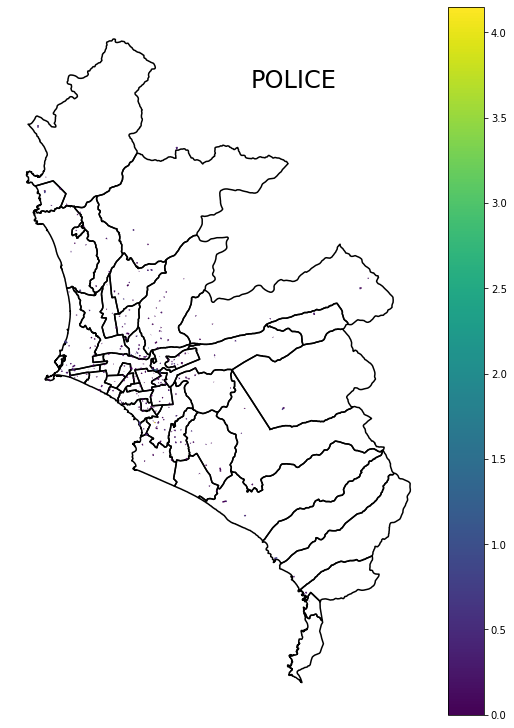

In [65]:

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,10))
# ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

mapaLimaCallao.boundary.plot(ax=ax, color='black', )

# lima_plot = lima_nodes.join(lima_amenity, how='inner')

# lima_plot.plot(column='wazeinfo1400_minutes', ax=ax, legend=True)
# lima_plot.plot(column='color', ax=ax, legend=True)
limaprivado2plot.plot(column='wazeinfo1400_minutes_y', ax=ax, legend=True)


fig.suptitle(amenity.upper(), x=0.7, y=0.91, fontsize = 24)
